# Исследование закономерностей, влияющих на популярность компьютерных игр

## 1.Чтение данных

In [81]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import seaborn as sns
sns.set_style("whitegrid")

In [82]:
#Анализ данных
games_data = pd.read_csv('/Users/chugu/Learning DS/Projects/Факторы популярности компьютерных игр/games.csv')

display(games_data.head(30))
print(games_data.info())
print()
print('Количество пропусков в таблице')
print(games_data.isnull().sum())
print('Количество дупликатов', games_data.duplicated().sum())
print()
print('Типы данных')
print(games_data.dtypes)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Количество пропусков в таблице
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score

### Вывод
Год выпуска игры отображён некорректно, с ним будет неудобно работать. Т.к. отображается только год, а не вся дата, можно будет заменить на целочисленный тип. Все названия необходимо привести к нижнему регистру. `User_Score` нужно заменить на float64, иначе с ним нельзя будет проводить математические операции, приведя все значения к цифрам или NaN.

В полученных данных есть пропуски, от которых можно сразу избавиться по причине их малочисленности - `Name`, `Year_of_Release`, `Genre`. NaN в `Year_of_Release` можно было бы заполнить по названию игры, если бы эти пропуски играли большую роль.

Пропуски в `Critic_Score` можно заменить на оценки из `User_Score` и наоборот из-за их схожести. Сходу можно выдвинуть предположение, что пропуски сразу во всех трёх столбцах с рейтингами видны по большей части у старых игр, когда понятие "рейтинг" не существовало. От слишком старых игр можно будет избавиться, т.к. они не могут сильно влиять на исследования - индустрия игр очень динамична, и что было актуальным 20 лет назад сейчас может не окупиться. 

## 2.Подготовка данных

### Приведение типов данных к корректному виду, удаление срок с малым кол-ом пропусков, добавление суммарных продаж

In [83]:
#приведение к нижнему регистру
games_data.columns = [i.lower() for i in games_data.columns]

#Удаление строк с пропусками
games_data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace=True)
games_data.reset_index()

#замена года выпуска на целочисленный тип
games_data['year_of_release'] = games_data['year_of_release'].astype(np.int64)

In [84]:
#Поиск и замена "tbd"
print('Количество оценок "tbd": ', games_data.query('user_score == "tbd"')['user_score'].count())
games_data['user_score'] = games_data['user_score'].replace('tbd', np.nan)

#Замена на тип данных object
games_data['critic_score'] = games_data['critic_score'].astype(np.object)

#Посчёт суммарных продаж
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

Количество оценок "tbd":  2376


In [85]:
print('Кол-во NaN в столбцах с рейтингами')
print(games_data[['critic_score', 'user_score', 'rating']].isnull().sum())
display(games_data.head())

Кол-во NaN в столбцах с рейтингами
critic_score    8461
user_score      8981
rating          6676
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод
TBD означает, что рейтинг игры ещё не определён - игра не вышла или вышла недавно. Отсутсвие рейтинга эквивалентно отсутсвию значения - NaN, что и стало отображаться в данных.

### Замена пропусков на схожие значения

In [86]:
games_data[['critic_score', 'user_score', 'rating']] = games_data[['critic_score', 'user_score', 'rating']].fillna('no score')

print('Кол-во NaN в столбцах с рейтингами')
print(games_data[['critic_score', 'user_score', 'rating']].isnull().sum())

print('Количество значений в таблице: ', len(games_data))

Кол-во NaN в столбцах с рейтингами
critic_score    0
user_score      0
rating          0
dtype: int64
Количество значений в таблице:  16444


### Вывод
Значения NaN заменены на `no score`, чтобы при исследовании учитывать строки с ними. Можно будет увидеть, какие были продажи у игр без рейтинга.

## 3.Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

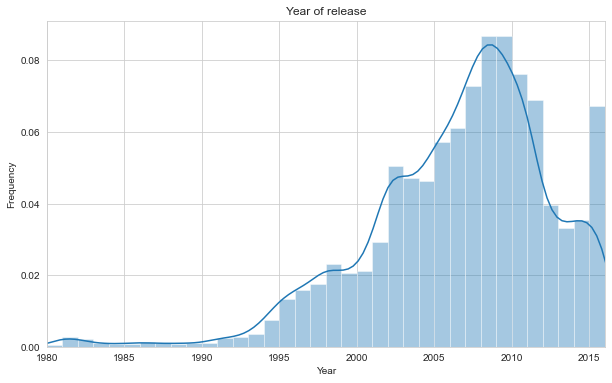

In [87]:
#Гистограмма 
all_years_bins = games_data['year_of_release'].max() - games_data['year_of_release'].min()
plt.figure(figsize=(10, 6))
sns.distplot(games_data['year_of_release'], bins=all_years_bins)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year of release')
axes = plt.gca()
axes.set_xlim([games_data['year_of_release'].min(),games_data['year_of_release'].max()])
plt.show()

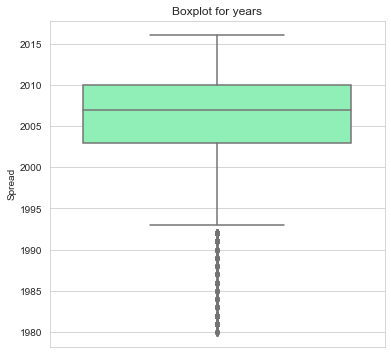

In [88]:
#Ящик с усами
plt.figure(figsize=(6, 6))
sns.boxplot(y='year_of_release', data=games_data, palette='rainbow')
plt.title('Boxplot for years')
plt.ylabel('Spread')
plt.show()

### Вывод
До 2000 года выпускалось сравнительно мало игр. Большая часть вышла с 2003 по 2010 год - самая важная часть выборки.

### Продажи по платформам

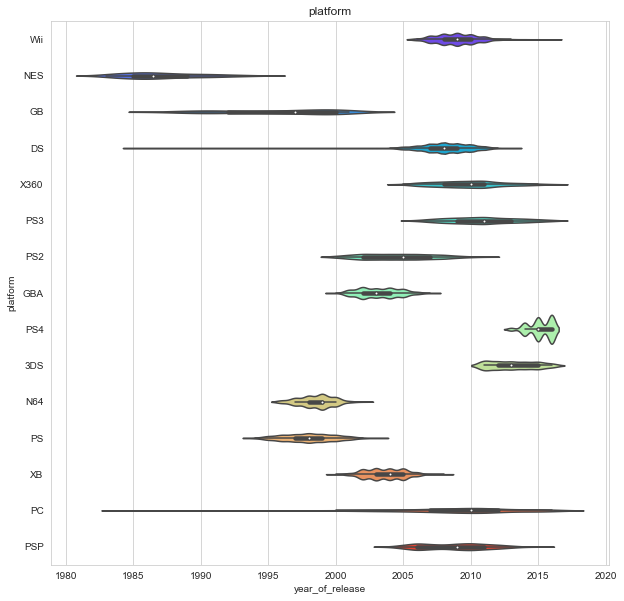

In [89]:
top_15_sales = games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(15) #платформы с самыми большими продажами
top_15_platforms = games_data.query('platform in @top_15_sales.index').reset_index()

#Функция для постройки плотности распределения
def violin_plot(data_plot, column_x, column_y):
    plt.figure(figsize=(10, 10))
    sns.violinplot(x=column_x, y=column_y, data=data_plot, palette='rainbow')
    plt.xlabel(column_x)
    plt.title(column_y)
    plt.show()

violin_plot(top_15_platforms, 'year_of_release', 'platform')    

In [90]:
#обнаружение и удаление выброса в продажах PC
DS_incorrect = top_15_platforms.query('platform == "DS" and year_of_release < 2004')
top_10_platforms = top_15_platforms[~top_15_platforms.index.isin(DS_incorrect.index)]

### Вывод
Отобрав консоли с самыми большими продажами, была построена плотность распределения по годам для каждой платформы. По 'виоланчелям' можно определить средний срок использования консолей: 8-10 лет. 
Замечено, что у DS есть выброс в 1985 году, хотя консоль появилась в 2004. Выброс был удалён.

На основании прошлых двух пунктов сделан вывод, что наиболее актуальный период для рассмотрения - с 2010 года, т.к. предыдущие периоды не актуальны. Необходимо взять платформы, на которых идут продажи и в 2014 году - 3DC, PSP и PS2. А это с 2010 года.

При исследовании влияния на популярность игр за все время, можно было бы учитывать все данные, либо данные игр с 2000 года, когда игры приняли относительно современный вид.

### Какие платформы лидируют по продажам, растут или падают

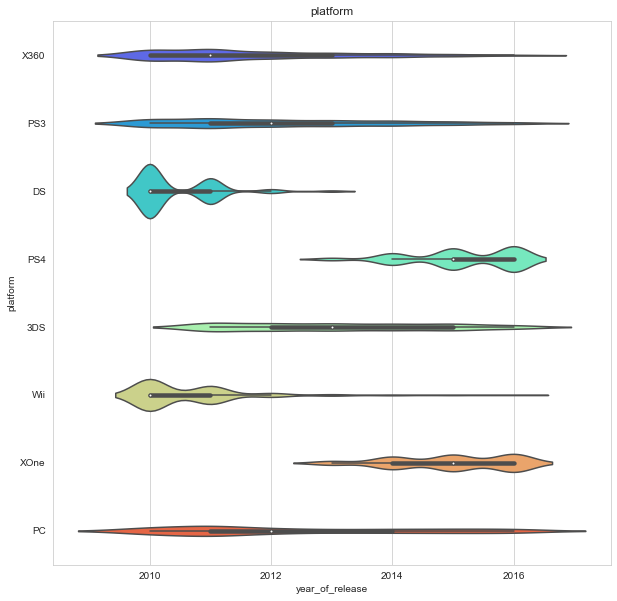

In [91]:
#выбор актуальных данных на основании прошлого вывода
all_relevant_games = games_data.query('year_of_release >= 2010')
top_relevant_games = all_relevant_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(8)
relevant_games_data = games_data.query('platform in @top_relevant_games.index and year_of_release >= 2010')

violin_plot(relevant_games_data, 'year_of_release', 'platform') 

### Вывод
Лидирующие платформы - PS4 и 3DS, они же показывают рост. Предшественники этих консолей теряют популярность. Игры для PC имеют стабильные, хоть и меньшие продажи.
Вывод - ориентироваться необходимо на PS4, 3DS и PС, как меньших по количеству, но гарантированных потребителей.

### Диаграмма размаха  по глобальным продажам игр в разбивке по платформам

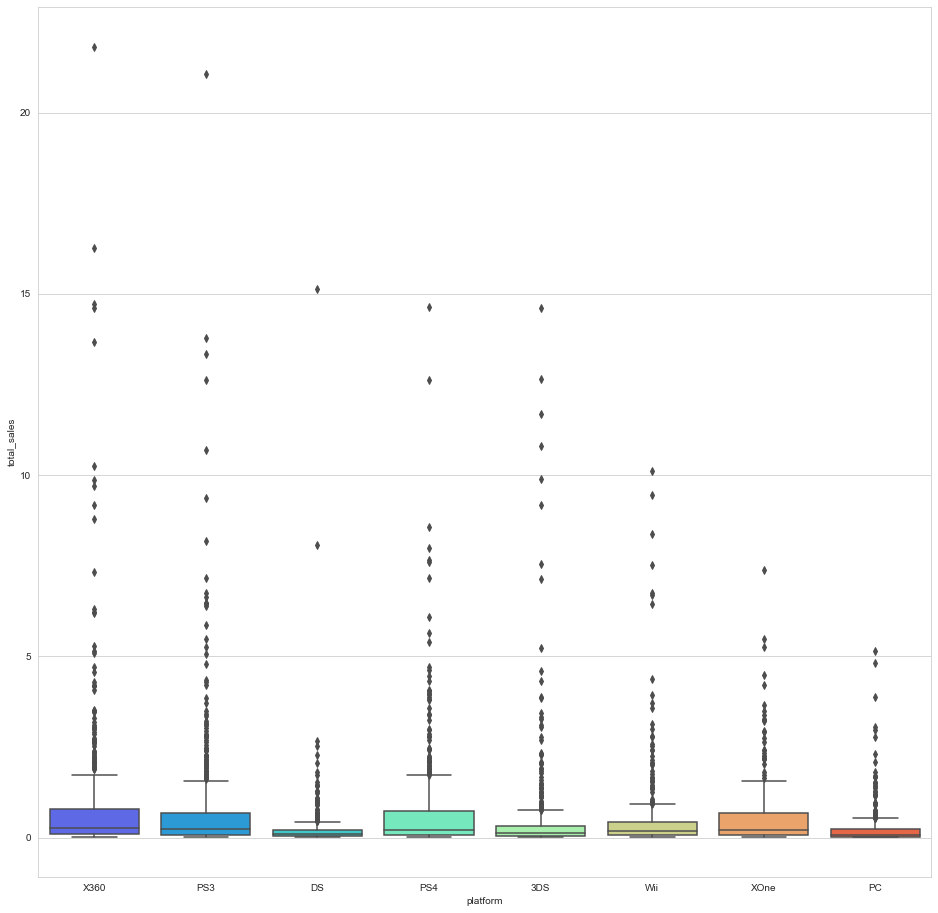

In [92]:
plt.figure(figsize=(16, 16))
sns.boxplot(x="platform", y="total_sales", data=relevant_games_data, palette='rainbow')
plt.show()

### Вывод
Большинство продаваемых игр зарабатывают не очень высокую выручку для всех платформ. Высокоприбыльные проекты очень редки по сравнению с общим количеством игр, но они тянут выручку сильно вверх. 

### Определение влияния на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [93]:
#Выбор платформы
new_games_data = pd.read_csv('/Users/chugu/Learning DS/Projects/Факторы популярности компьютерных игр/games.csv')
new_games_data.columns = [i.lower() for i in new_games_data.columns]
new_games_data['user_score'] = new_games_data['user_score'].replace('tbd', np.nan)
new_games_data['user_score'] = new_games_data['user_score'].astype(np.float64)
new_games_data['total_sales'] = new_games_data['na_sales'] + new_games_data['eu_sales'] + new_games_data['jp_sales'] + new_games_data['other_sales']
PS4_games = new_games_data.query('platform == "PS4"')

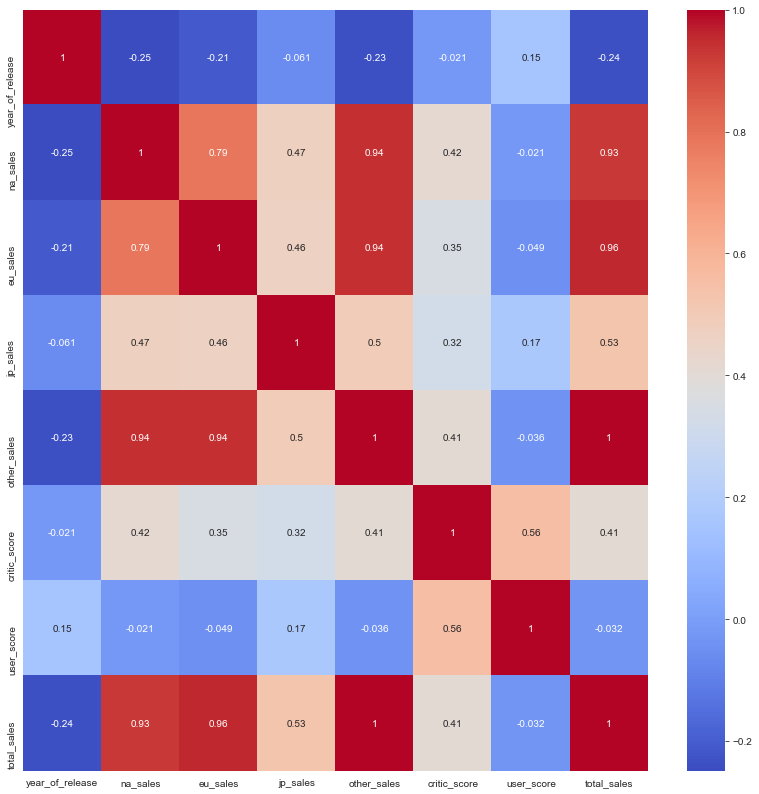

In [94]:
#Карта корреляций данных с пропусками
plt.figure(figsize=(14, 14))
sns.heatmap(PS4_games.corr(),cmap='coolwarm',annot=True)

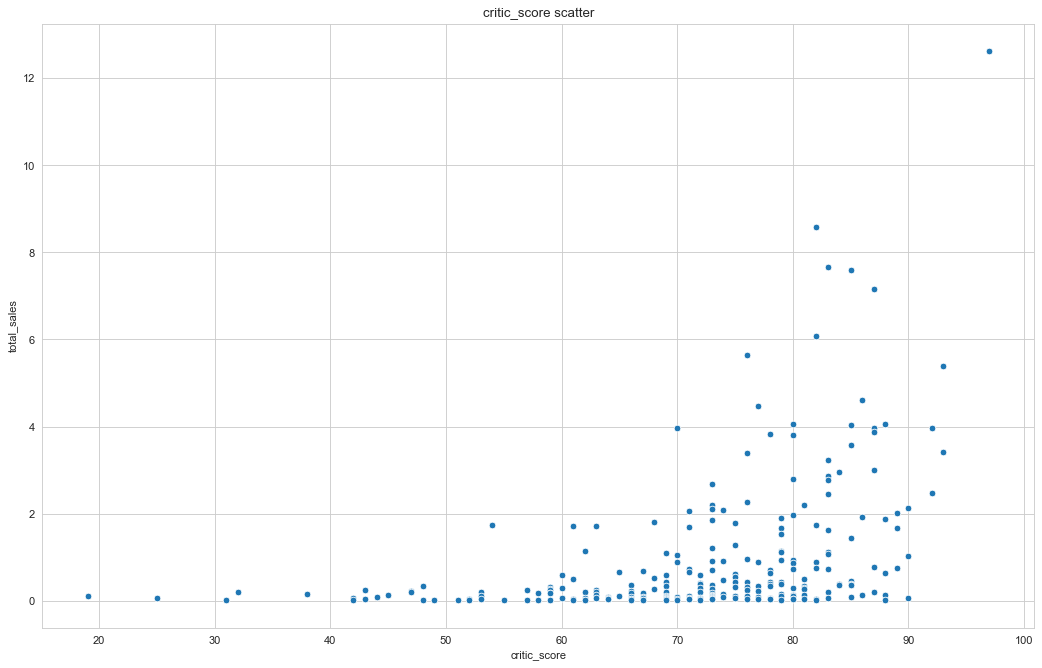

In [95]:
#диаграмма рассеивания 
def scatter_plot(data, column_x, column_y):
    fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
    sns.scatterplot(data[column_x], data[column_y])
    plt.title(column_x+' scatter')
    plt.show

scatter_plot(PS4_games, 'critic_score', 'total_sales')   

### Вывод 
Для оценки актуальной ситуации была выбрана самая свежая платформа - PS4. Исходя из таблицы и диаграмм рассеивания можно предположить, что влияние рейтинга не слишком сильно влияет на объём продаж, однако эта зависимость и прослеживается. Влияние мнения критиков гораздо сильнее, чем пользователей.

### Определение влияния на другие платформы

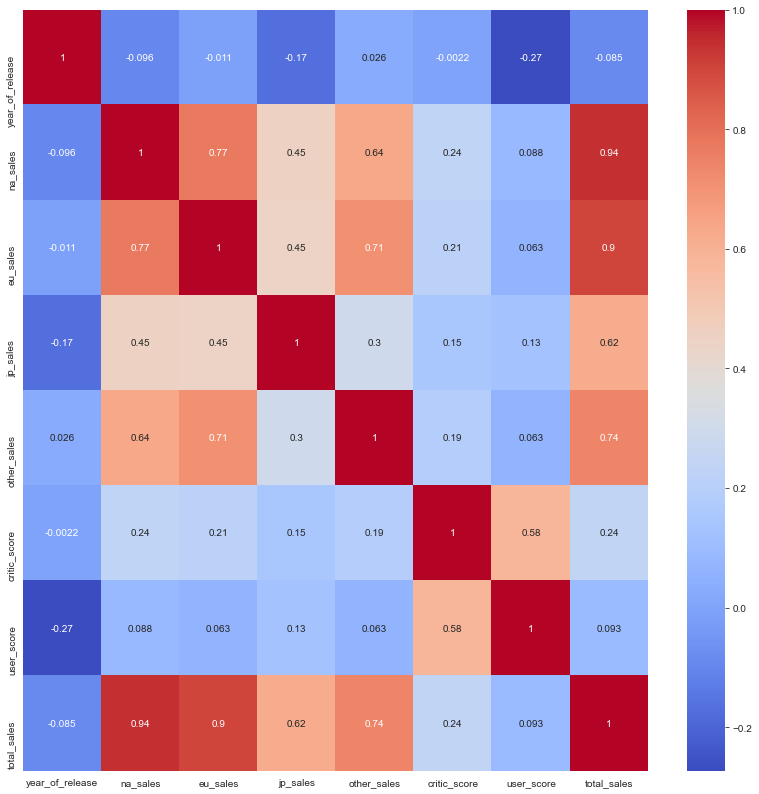

In [96]:
#Выбор других платформ
not_PS4_games = new_games_data.query('platform != "PS4"')

#Карта корреляций данных с пропусками
plt.figure(figsize=(14, 14))
sns.heatmap(not_PS4_games.corr(),cmap='coolwarm',annot=True)

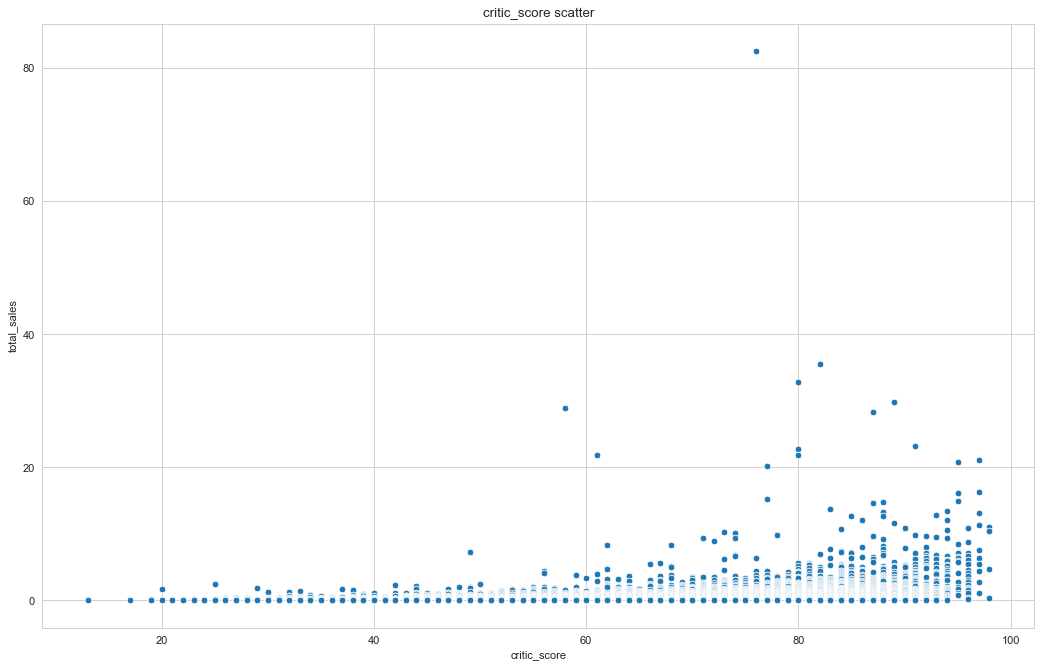

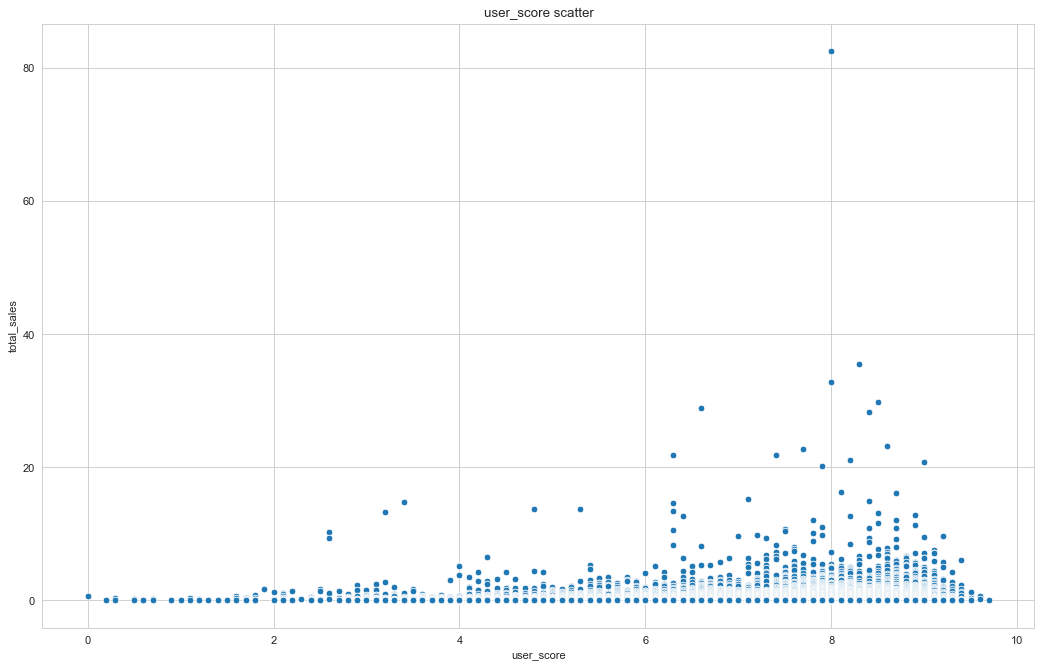

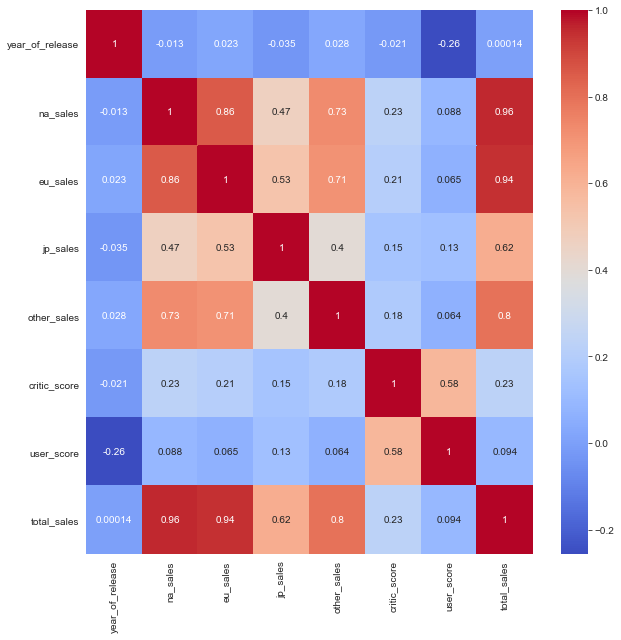

In [97]:
#диаграммы рассеивания 
scatter_plot(not_PS4_games, 'critic_score', 'total_sales')      
scatter_plot(not_PS4_games, 'user_score', 'total_sales')

#таблица корреляции для данных без пропусков
droped_games_data = not_PS4_games.dropna()
plt.figure(figsize=(10, 10))
sns.heatmap(droped_games_data.corr(),cmap='coolwarm',annot=True)

### Вывод
Зависимости для остальных платформ похожи на полученные данные для PS4 кроме зависимости от рейтинга игроков - она стала прямой и более сильной, но всё равно не догоняет до влияния рейтинга критиков.

Таблицы коэффициентов корреляции без пропусков и с ними почти одинаковы, следовательно, наличие пропусков не влияет на характер связи и исследование. Данные с пропусками можно использовать.

### Общее распределение игр по жанрам

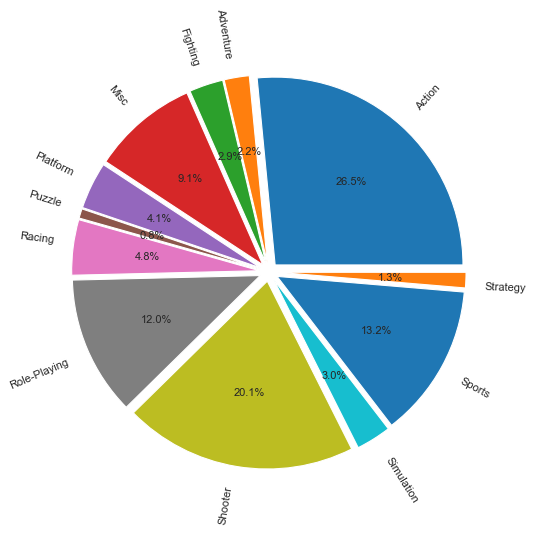

,total_sales
genre,
Action,620.29
Shooter,468.79
Sports,309.49
Role-Playing,280.15
Misc,213.53
Racing,111.43
Platform,94.81
Simulation,70.53
Fighting,68.40


In [98]:
genre_general = relevant_games_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')

#круговая диаграмма 
def pie_diagram(data, column):
    explode = [0.05]*len(data)                
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
    ax.pie(data[column], labels=data.index, autopct='%1.1f%%', explode = explode, rotatelabels=True)
    ax.axis("equal")
    plt.show()

pie_diagram(genre_general, 'total_sales')
display(genre_general.sort_values(by='total_sales', ascending=False))

### Вывод
Распределение по жанрам очень неравномерное, самые высокие продажи у жанра Action, следом идёт Sports. Жанр стратегий занимает низшую позицию с большим отрывом. Век стратегий прошёл, Артас не даст соврать.

## Составление портрета пользователя  для пользователя каждого региона

### Самые популярные платформы (топ-5)

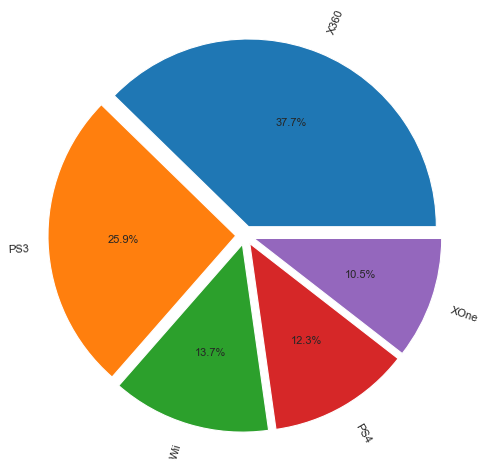

In [99]:
#North America платформы
top5_platforms_NA = relevant_games_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
pie_diagram(top5_platforms_NA, 'na_sales')

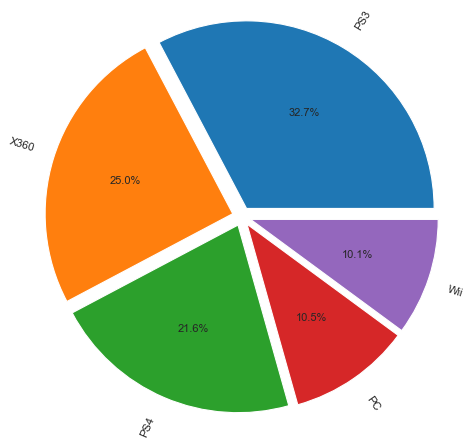

In [100]:
#Europa platforms
top5_platforms_EU = relevant_games_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
pie_diagram(top5_platforms_EU, 'eu_sales')

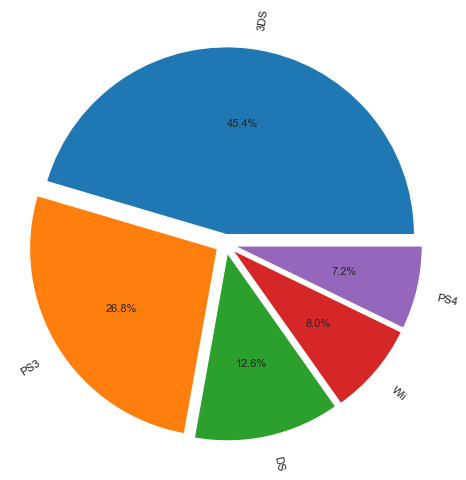

,na_sales
platform,
X360,334.18
PS3,229.25
Wii,121.20
PS4,108.74
XOne,93.12


,eu_sales
platform,
PS3,213.60
X360,163.41
PS4,141.09
PC,68.82
Wii,65.91


,jp_sales
platform,
3DS,100.62
PS3,59.26
DS,27.90
Wii,17.75
PS4,15.96


In [101]:
#Japan platforms 
top5_platforms_JP = relevant_games_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
pie_diagram(top5_platforms_JP, 'jp_sales')

display(top5_platforms_NA, top5_platforms_EU, top5_platforms_JP)

### Вывод
Популярные платформы почти одинаковы для каждого региона, отличается лишь их доля на рынке.

### Самые популярные жанры (топ-5)

In [102]:
#NA, EU, JP жанры
top5_genres_NA = relevant_games_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
top5_genres_EU = relevant_games_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
top5_genres_JP = relevant_games_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

display(top5_genres_NA, top5_genres_EU, top5_genres_JP)

,na_sales
genre,
Action,273.62
Shooter,233.26
Sports,151.02
Misc,117.36
Role-Playing,106.92


,eu_sales
genre,
Action,219.55
Shooter,167.91
Sports,111.35
Role-Playing,72.52
Misc,61.28


,jp_sales
genre,
Role-Playing,78.30
Action,56.03
Misc,15.88
Simulation,12.71
Shooter,12.08


### Вывод
Различие в жанрах более сильное по сравнению с платформами, но самые популярные жанры - sports и action есть везде. Важное замечание - в японии с большим отрывом лидирует RPG.

### Влияние рейтинга ESRB на продажи в отдельном регионе

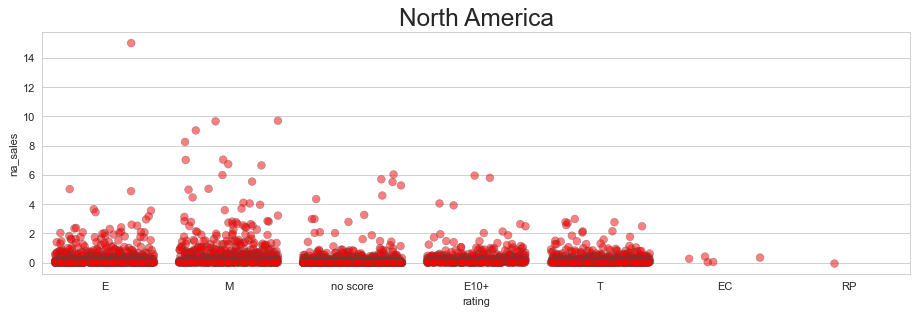

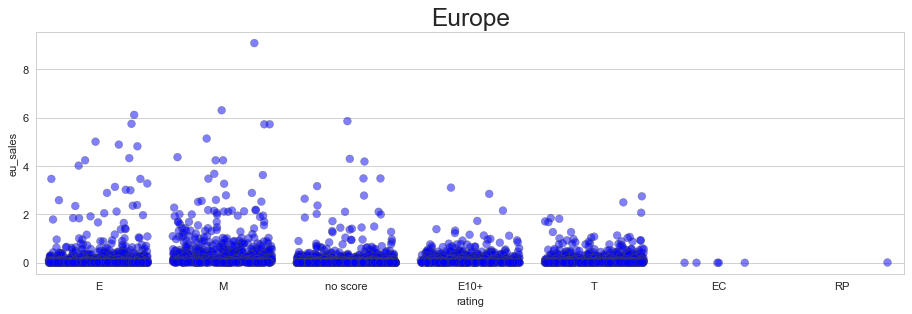

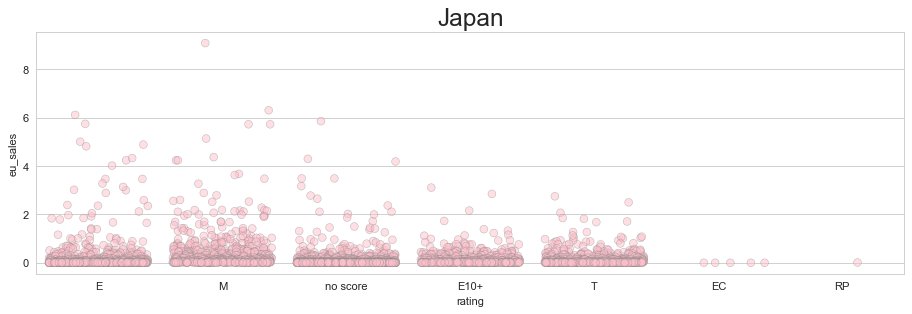

In [103]:
#Построение stripplot для регионов
fig, ax = plt.subplots(figsize=(14,4), dpi= 80) 
sns.stripplot(relevant_games_data['rating'], relevant_games_data['na_sales'], jitter=0.4, size=7, ax=ax, linewidth=.5, alpha = 0.5, color='red', label='NA')
plt.title('North America', fontsize=22)
plt.show()

fig, ax = plt.subplots(figsize=(14,4), dpi= 80) 
sns.stripplot(relevant_games_data['rating'], relevant_games_data['eu_sales'], jitter=0.4, size=7, ax=ax, linewidth=.5, alpha = 0.5, color='blue', label='Europe')
plt.title('Europe', fontsize=22)
plt.show()

fig, ax = plt.subplots(figsize=(14,4), dpi= 80) 
sns.stripplot(relevant_games_data['rating'], relevant_games_data['eu_sales'], jitter=0.4, size=7, ax=ax, linewidth=.5, alpha = 0.5, color='pink', label='Japan')
plt.title('Japan', fontsize=22)
plt.show()


### Вывод
Возрастной рейтинг сильно влияет на продажи - чем он ниже, тем больше охват и выше выручка. Влияние рейтинга в зависимости от региона не наблюдается. Если у игры не определён рейтинг, она тоже имеет хорошие шансы на большую выручку.

## Проверка гипотез
В данном исследовании проверяется, равны ли между собой две генеральные совокупности - 1) средние пользовательские рейтинги платформ Xbox One и PC, 2) средние пользовательские рейтинги жанров Action и Sports. Нулевая гипотеза формируется исходя из предположения, что генеральные совокупности равны. Альтернативная, наоборот, не равны. Альтернативная теория будет двухсторонней.

Нулевая теория будет подтверждена, если уровень значимости статистики разности (p-value) между средним совокупности и предполагаемым числом будет больше уровная значимости (alpha). Уровень значимости показывает суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего.

Следовательно, если уровень значимости статистики разности p-value будет больше уровня значимости alpha, это будет означать, что вероятность выборочного среднего попасть ближе к истинно среднему выборки велико, и гипотеза подтверждает выдвинутое предположение. Если p-value < alpha, то выбранное среднее лежит далеко от истинного, и верна альтернативная гипотеза.

Выборки при исследовании будут браться из двух схожих совокупностей - статистик тарифов. Диспресии должны быть примерно равны. В этом случае, дисперсия каждой выборки будет оценена по объединённому датасету из двух выборок.

### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

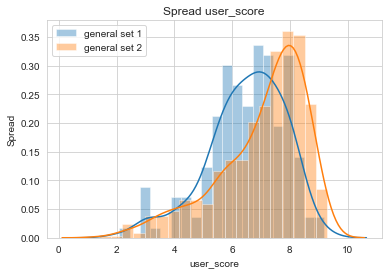

Дисперсии сильно отличаются, equal_var = False
p-значение: 6.469147981752583e-06
Отвергаем нулевую гипотезу


In [104]:
#Выбор платформы, для точных расчсётов надо избавится от пропусков, иначе p-значение будет nan
XOne_score = new_games_data.query('platform == "XOne"').dropna()
PC_score = new_games_data.query('platform == "PC"').dropna()
#display(XOne_score.head(10))

#построение распределения генеральных совокупностей
def hist2_print(data1, data2, column): #построение графиков зависимостей scatterplot на одном графике
    sns.distplot(data1[column], bins=20, label='general set 1')
    sns.distplot(data2[column], bins=20, label='general set 2')
    plt.xlabel(column)
    plt.ylabel('Spread')
    plt.title('Spread '+ column)
    plt.legend()
    plt.show()
    
hist2_print(XOne_score, PC_score, 'user_score')
    
#проверка равности дисперсий
def variance_match(data1, data2, column):
    variance1 = round(np.var(data1[column]))
    variance2 = round(np.var(data2[column]))
    if variance1 - variance2 / variance1 < 0.1:
        print('Дисперсии одинаковы')
    else:
        print('Дисперсии сильно отличаются, equal_var = False')

        
variance_match(XOne_score, PC_score, 'user_score')

alpha = 0.05 #критический уровень статистической значимости

results = st.ttest_ind(XOne_score['user_score'], PC_score['user_score'], equal_var = False)#проверьте гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)#p-значение

if (results.pvalue < alpha):# ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


### Вывод
Нулевая гипотеза отвергнута, соответственно, более вероятно, что выручка у двух платформ различается. Распределение и дисперсия отличаются достаточно сильно. 

### Средние пользовательские рейтинги жанров Action и Sports разные

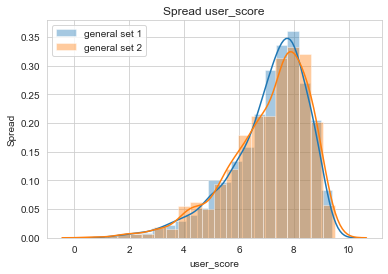

Дисперсии сильно отличаются, equal_var = False
p-значение: 0.7980492910095923
Не получилось отвергнуть нулевую гипотезу


In [105]:
#Выбор жанра
Action_score = new_games_data.query('genre == "Action"').dropna()
Sports_score = new_games_data.query('genre == "Sports"').dropna()
#display(XOne_score.head(10))

#построение распределения генеральных совокупностей 
hist2_print(Action_score, Sports_score, 'user_score')
    
#проверка равности дисперсий
def variance_match(data1, data2, column):
    variance1 = round(np.var(data1[column]))
    variance2 = round(np.var(data2[column]))
    if variance1 - variance2 / variance1 < 0.1:
        print('Дисперсии одинаковы')
    else:
        print('Дисперсии сильно отличаются, equal_var = False')

        
variance_match(Action_score, Sports_score, 'user_score')

alpha = 0.05 #критический уровень статистической значимости

results = st.ttest_ind(Action_score['user_score'], Sports_score['user_score'], equal_var = False)#проверьте гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue)#p-значение

if (results.pvalue < alpha):# ваш код: сравните получившееся p-значение с заданным уровнем статистической значимости):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

### Вывод
Распределения схожи, отвергнуть гипотезу не получилось. С вероятностью почти 20% различие в продажах по жанру случайно, поэтому нельзя судить о какой-то закономерности.

## Общий вывод

На основании исследования можно сделать следующие выводы о том, какая игра будет более выгодна:
- чем мягче возрастной рейтинг, тем лучше. Больше охват аудитории;
- самые популярные жанры для всего мира - action и sports, различия между которыми скорее всего случайны, как показала проверка второй гипотезы;
- тем не менее, дтля каждого региона есть своя специфика, к примеру, в Японии более популярны RPG. Планировать рекламу игры стоит привязываясь к конкретному региону и его особенностям;
- очень многие игры получают доход, многократно превышащий среднюю выручку по играм;
- игровые платформы меняются сравнительно часто и у них, как показала проверка первой гипотезы, различные показатели продаж; 
- если цель - выручка, не стоит слишком сильно гнаться за рейтингом критиков и пользователей, они не прямо коррелируют с ней. Более важен вывод критиков, чем пользователей (грустно);

Пользуясь этими выводами, можно подбирать потенциально прибыльные проекты и исходя из этого строить маркетинговую компанию.